In [1]:
%matplotlib inline
import os
import shutil
import math
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
stats = pd.read_csv('/media/NGS/Sequence/Neisseria_gonorrhoeae/Stats.csv')

# stats = stats[stats['Platform'].notna()]
stats = stats.fillna('')
stats = stats[~stats['Platform'].str.contains('Ion')]

In [3]:
identify = pd.read_csv('/media/NGS/Sequence/Neisseria_gonorrhoeae/Identify.csv', index_col=0)
identify = identify[identify['Species'] == 'Neisseria gonorrhoeae']

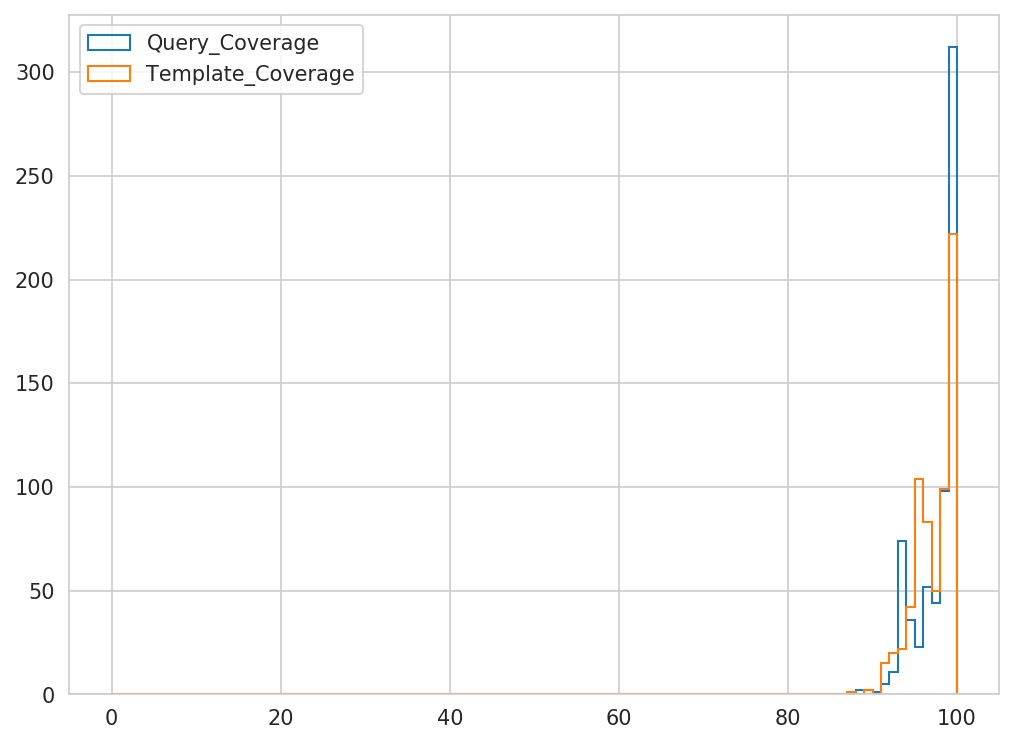

In [4]:
plt.figure(figsize=(8, 6), dpi=150)
plt.hist(identify['Query_Coverage'], bins=range(0, 101), histtype='step', label='Query_Coverage')
plt.hist(identify['Template_Coverage'], bins=range(0, 101), histtype='step', label='Template_Coverage')
plt.legend(loc=2);

In [7]:
# identify = identify[(identify['Query_Coverage']>=62)&(identify['Template_Coverage']>=62)]

In [8]:
table = stats[stats['Assembly'].isin(identify.index)]
table.shape

(658, 13)

# Combine metadata selection

In [9]:
def fence(df, subset):
    std = df[subset].std()
    mean = df[subset].mean()
    return (df[subset]>(mean - 2*std))&(df[subset]<(mean + 2*std))

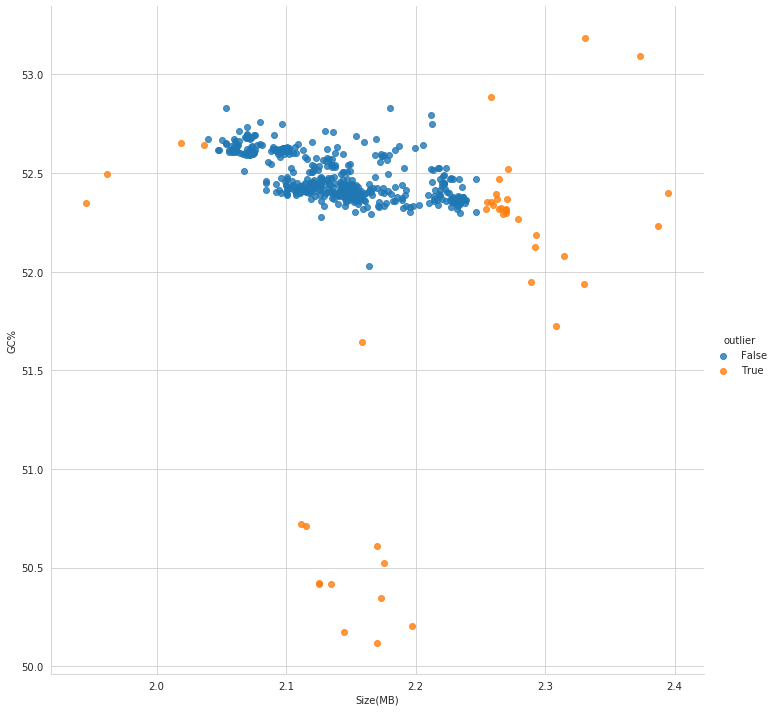

In [10]:
table['outlier'] = ~(fence(table, 'GC%') & fence(table, 'Size(MB)'))

sns.lmplot(data=table, x="Size(MB)", y="GC%", fit_reg=False, height=10, hue='outlier')

In [23]:
curated = table[~table['outlier']]
curated.shape

(615, 14)

# N50

Text(0, 0.5, 'number')

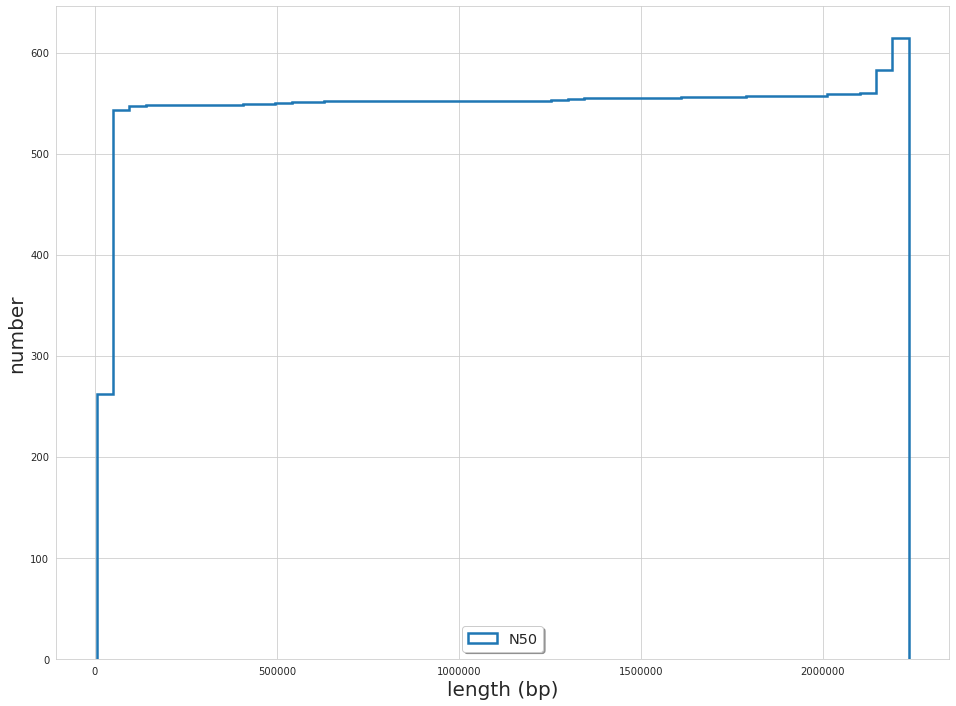

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(curated["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)

Text(0, 0.5, 'number')

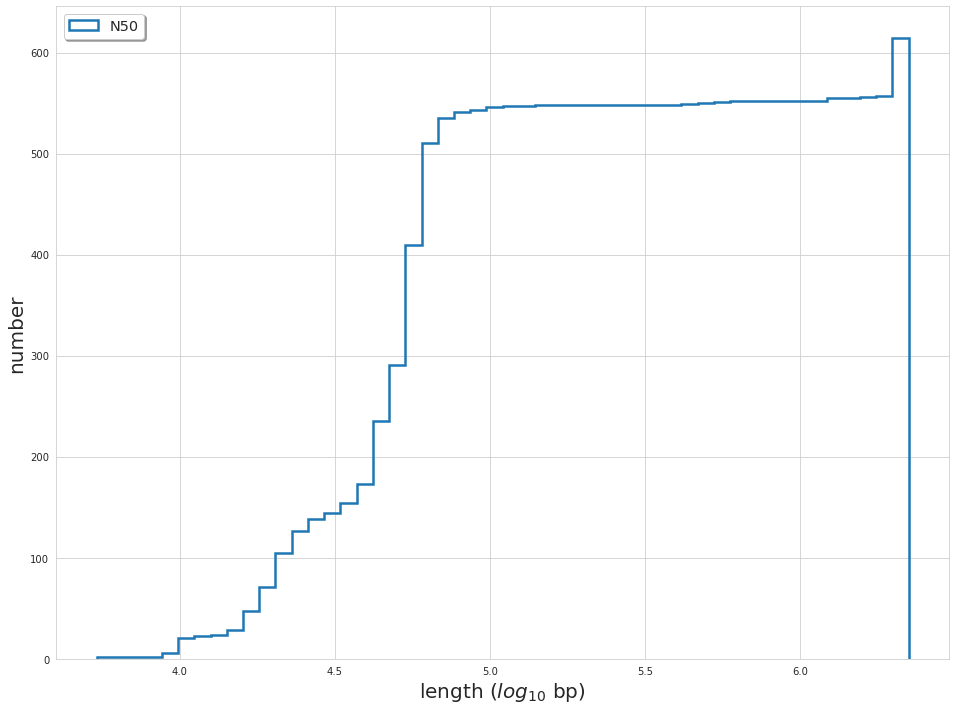

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(curated["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)

# comparison with serotypes

In [14]:
curated = curated[curated['N50'] >= 10 ** 4.7]
curated.shape

(353, 14)

Text(0.5, 1.0, 'Genome contig number distribution')

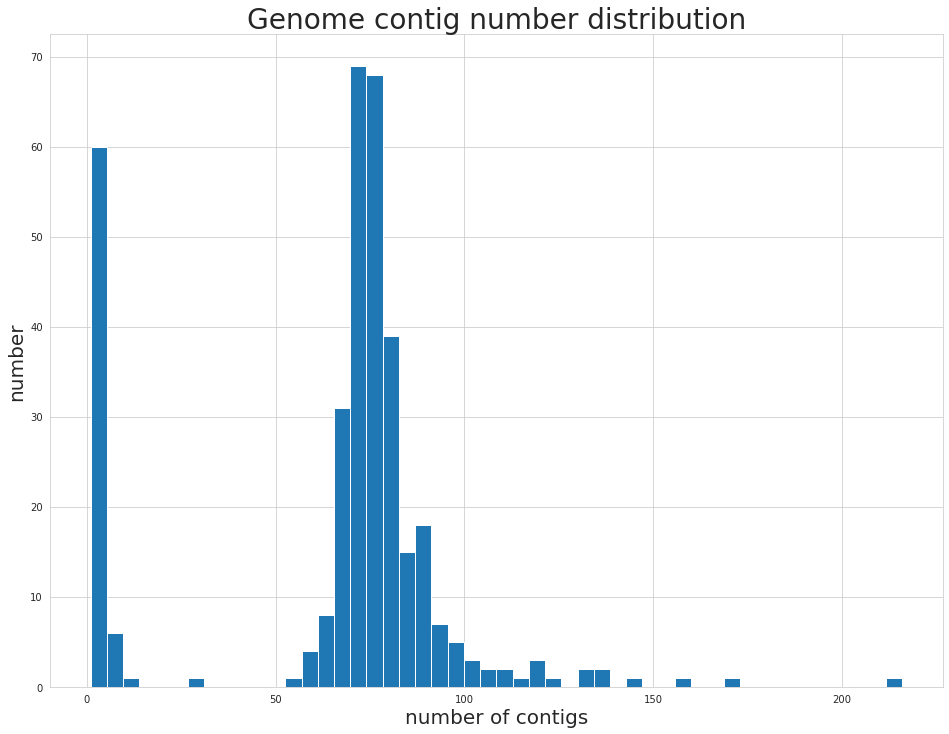

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(curated["num_seqs"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)

In [16]:
curated = curated[curated['num_seqs']<100]
curated.shape

(333, 14)

In [17]:
for i in curated['Assembly']:
    shutil.copy(os.path.join('/media/NGS/Sequence/Neisseria_gonorrhoeae/Genomes', i+'.fna'), '/media/NGS/Sequence/Neisseria_gonorrhoeae/Genomes_clean')